# Mass transfer in the Krogh cylinder

![Hydrogel Schematic](img/krogh.png)

The problem is to solve the following equation in the cylindrical coordinates. 

\begin{equation}
\frac{D_{O_2}}{r} \frac{d}{d r}\left(r \frac{d C_{O_2}}{d r}\right)=R_{O_2}
\end{equation}

Let's simplify the equation so as the symbols imply $c = C_{O_2}, D = D_{O_2}, R = R_{O_2}$:

\begin{equation}
\frac{D}{r} \frac{d}{d r}\left(r \frac{d c}{d r}\right)=R
\end{equation}

The boundary conditions for the Krogh cylinder are:

\begin{equation}
\begin{array}{l}
r=R_{c} \rightarrow c=C_{R_{c}} \\
r=R_{0} \rightarrow \frac{d c}{d r}=0
\end{array}
\end{equation}

## Solving the equation

Let's solve the equation using calculus principals. It should be taken into account that $c = c(r)$ in this case. We start by integrating both sides of the equation:

\begin{equation}\int \frac{d}{d r}\left(r \frac{d c}{d r}\right) dr =\int \frac{R r}{D} dr\end{equation}

\begin{equation}\rightarrow r \frac{d c}{d r}=\frac{R r^{2}}{2 D}+C_1\end{equation}

We can simply use the second boundary condition to get the value of $C_1$. We know $\frac{d c}{d r} = 0$ at $r = R_0$, so:

\begin{equation}
0=\frac{R R_{0}^{2}}{2 D}+C_{1} \rightarrow C_{1}=\frac{-R R_{0}^{2}}{2 D}
\end{equation}

We still have a derivitive term in the equation, so we continue to integrate it again to eliminate that term:

\begin{equation}\int \frac{d c}{d r}dr=\int \frac{R r}{2 D}dr+\int \frac{C_{1}}{r}dr\end{equation}

\begin{equation}
\rightarrow c(r)=\frac{R r^{2}}{4 D}+C_{1} \ln (r)+C_{2}
\end{equation}

We already know the value of $C_1$, and by using the first boundary condition, we can obtain the value of $C_2$ as well. According to the first boundary condition, $c(r) = C_{R_{c}}$ at $r = R_c$, so (by incorporating the value of $C_1$):

\begin{equation}
C_{R_{c}}=\frac{R R_{c}^{2}}{4 D} -\frac{R R_{0}^{2}}{2 D} \ln R_{c}+C_{2}
\end{equation}

\begin{equation}
\rightarrow C_{2}=\frac{R}{4 D}\left( 2 R_{0}^{2} \ln R_{c} -R_{c}^{2}\right)+C_{R_{c}}
\end{equation}

Now, by knowing the value of $C_1$ and $C_2$ and having no remained derivitive in the equation, we can formulate the change of concentration of oxygen throughout the Krogh cylinder:

\begin{equation}
C=\frac{R r^{2}}{4 D} - \frac{R R_{0}^{2}}{2 D} \ln (r)+\frac{R}{4 D}\left(2 R_{0}^{2} \ln R_{c}-R_{c}^{2}\right)+C_{R_{c}}
\end{equation}


## Solve with Sympy

In [1]:
from sympy import init_session
init_session(quiet=True)

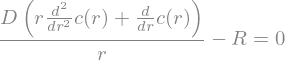

In [2]:
r, D, R= symbols("r, D, R", positive=True)
c = Function("c") 
ode = D / r * (r * c(r).diff(r)).diff(r) - R
Eq(ode, 0)

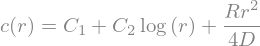

In [3]:
ode_sol = dsolve(ode)
ode_sol

It worth noting that the `log` function in Python (and of course Sympy) is the same as the `ln` function we all know in mathematics.

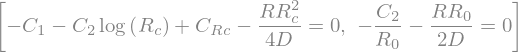

In [6]:
Rc, R0, CRc = symbols("R_c, R_0, C_Rc", positive=True)
ics = {c(Rc): CRc, c(r).diff(r).subs(r, R0): 0}
parameters = ode_sol.free_symbols - set([D, R, r])
eq1 = (ode_sol.lhs - ode_sol.rhs).subs(r, Rc).subs(ics)
eq2 = (ode_sol.lhs - ode_sol.rhs).diff(r).subs(r, R0).subs(ics)
eqs = [eq1, eq2]
[Eq(eq1, 0), Eq(eq2, 0)]

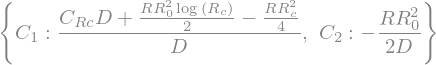

In [7]:
sol_params = solve(eqs, parameters)
sol_params

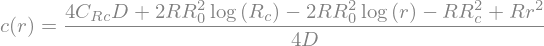

In [14]:
cr_sol = ode_sol.subs(sol_params)
factor(cr_sol)